# Homework 24

This assignment uses a dataset of all NYC restaurant inspection results from Jan. 1, 2019 - Aug. 30, 2019. The original, unfiltered dataset is at https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j.

Download the filtered dataset from: [https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/DOHMH_New_York_City_Restaurant_Inspection_Results_Feb2020.csv](https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/DOHMH_New_York_City_Restaurant_Inspection_Results_Feb2020.csv)

Information about how restaurants are inspected and graded in NYC is here: https://www1.nyc.gov/assets/doh/downloads/pdf/rii/how-we-score-grade.pdf(https://www1.nyc.gov/assets/doh/downloads/pdf/rii/how-we-score-grade.pdf)

### Question 1: Load the data and exploratory data analysis

a) Load the restaurant inspection data into a DataFrame.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
restaurants = pd.read_csv("https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/DOHMH_New_York_City_Restaurant_Inspection_Results_Feb2020.csv")
restaurants.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,41722899,MI CANDILEJAS RESTAURANT,Brooklyn,1509,MERMAID AVENUE,11224.0,7182666161,Latin American,02/01/2020,U,10F,Non-food contact surface improperly constructe...,G,27.0,NaN,NaN,04/30/2021,Cycle Inspection / Initial Inspection,40.576835,-73.982872,313.0,47.0,34800.0,3256857.0,3.070220e+09,BK21
1,50015528,THE BEAST NEXT DOOR,Queens,42-51,27 STREET,11101.0,6466392345,American,02/01/2020,D,04N,Filth flies or food/refuse/sewage-associated (...,C,10.0,A,02/01/2020,04/30/2021,Cycle Inspection / Re-inspection,40.748916,-73.940980,402.0,26.0,1900.0,4005106.0,4.004310e+09,QN31
2,50073026,HIBACHI STATION,Queens,8312,37TH AVE,11372.0,6466332522,Japanese,02/01/2020,D,10F,Non-food contact surface improperly constructe...,G,9.0,A,02/01/2020,04/30/2021,Cycle Inspection / Initial Inspection,40.749852,-73.883160,403.0,21.0,28100.0,4036224.0,4.014710e+09,QN28
3,50081649,PAULIE GEE SLICE JOINT,Brooklyn,110,FRANKLIN STREET,11222.0,9293376385,Pizza,02/01/2020,D,06A,Personal cleanliness inadequate. Outer garment...,C,12.0,A,02/01/2020,04/30/2021,Cycle Inspection / Initial Inspection,40.728349,-73.957332,301.0,33.0,56100.0,3064950.0,3.025690e+09,BK76
4,41127209,BACI & ABBRACCI,Brooklyn,204,GRAND STREET,11211.0,7185996599,Italian,02/01/2020,D,08A,Facility not vermin proof. Harborage or condit...,G,12.0,A,02/01/2020,04/30/2021,Cycle Inspection / Initial Inspection,40.714096,-73.960342,301.0,34.0,55100.0,3062796.0,3.023930e+09,BK73


1b) Plot a bar chart of the top 20 restaurant cuisines (found in the column `CUISINE DESCRIPTION`).  Which cuisine is most popular?

Text(0.5,1,'Top cuisines in restaurants inspected in February 2020')

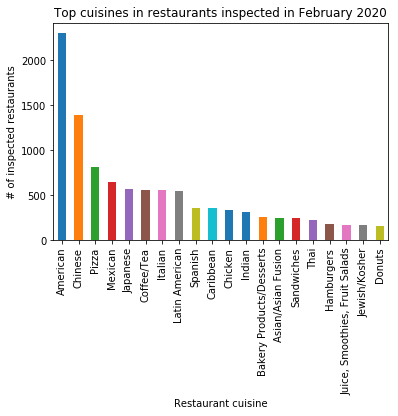

In [22]:
counts = restaurants["CUISINE DESCRIPTION"].value_counts()
counts.head(20).plot(kind = "bar")
plt.xlabel("Restaurant cuisine")
plt.ylabel("# of inspected restaurants")
plt.title("Top cuisines in restaurants inspected in February 2020")

**1b answer:** The most popular restaurant cuisine in New York (of the restaurants inspected in February 2020) is American.

1c) Plot a bar chart of the top 20 restaurant cuisines (found in the column CUISINE DESCRIPTION) found in the 10468 zip code (which includes Lehman). Which cuisine is most popular?

In [25]:
restaurants_10468 = restaurants[restaurants["ZIPCODE"] == 10468]
restaurants_10468.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
3595,50065358,ANDIAMO CAFE,Bronx,2467,GRAND CONCOURSE,10468.0,7186187989,American,02/10/2020,U,06F,Wiping cloths soiled or not stored in sanitizi...,C,19.0,B,02/10/2020,04/30/2021,Cycle Inspection / Re-inspection,40.861722,-73.897543,205.0,14.0,23703.0,2013810.0,2.031660e+09,BX40
3660,50065358,ANDIAMO CAFE,Bronx,2467,GRAND CONCOURSE,10468.0,7186187989,American,02/10/2020,U,08A,Facility not vermin proof. Harborage or condit...,G,19.0,B,02/10/2020,04/30/2021,Cycle Inspection / Re-inspection,40.861722,-73.897543,205.0,14.0,23703.0,2013810.0,2.031660e+09,BX40
3736,50065358,ANDIAMO CAFE,Bronx,2467,GRAND CONCOURSE,10468.0,7186187989,American,02/10/2020,U,04N,Filth flies or food/refuse/sewage-associated (...,C,19.0,B,02/10/2020,04/30/2021,Cycle Inspection / Re-inspection,40.861722,-73.897543,205.0,14.0,23703.0,2013810.0,2.031660e+09,BX40
3814,50065358,ANDIAMO CAFE,Bronx,2467,GRAND CONCOURSE,10468.0,7186187989,American,02/10/2020,U,06D,"Food contact surface not properly washed, rins...",C,19.0,B,02/10/2020,04/30/2021,Cycle Inspection / Re-inspection,40.861722,-73.897543,205.0,14.0,23703.0,2013810.0,2.031660e+09,BX40
3836,50065358,ANDIAMO CAFE,Bronx,2467,GRAND CONCOURSE,10468.0,7186187989,American,02/10/2020,U,04M,Live roaches present in facility's food and/or...,C,19.0,B,02/10/2020,04/30/2021,Cycle Inspection / Re-inspection,40.861722,-73.897543,205.0,14.0,23703.0,2013810.0,2.031660e+09,BX40


Text(0.5,1,'Top cuisines in restaurants inspected in February 2020 in 10468 zip code')

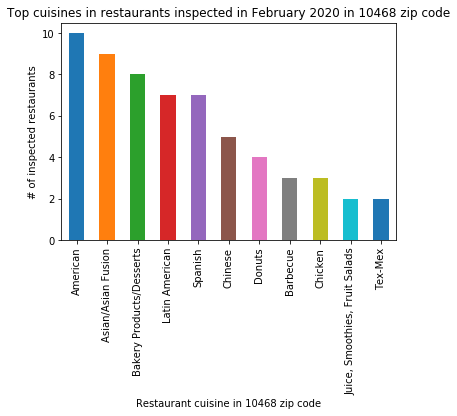

In [26]:
counts_10468 = restaurants_10468["CUISINE DESCRIPTION"].value_counts()
counts_10468.head(20).plot(kind = "bar")
plt.xlabel("Restaurant cuisine in 10468 zip code")
plt.ylabel("# of inspected restaurants")
plt.title("Top cuisines in restaurants inspected in February 2020 in 10468 zip code")

**1c answer:**  The most popular restaurant cuisine in the 10468 zip code is also American.

## Question 2

Is the distribution of cuisines in the 10468 zip code different than the distribution of cuisines in New York city as a whole?  As there are so many restaurants in NYC, we can assume the distribution of these restaurant cuisines is the population distribution.  We will use hypothesis testing of categorical data with multiple categories (Lab 25) to compare this NYC distribution with the distribution of restaurant cuisines in the 10468 zip code.

a) Our alternative hypothesis will be:
The distribution of cuisines in the 10468 zip code is different from the distribution of cuisines in all of New York city.

What is the null hypothesis?

**2a answer:** Null hypothesis:  The distribution of cuisines in the 10468 zip code is the same as the distribution of cuisines in all of New York city.

### Question 2b
Create a dataframe where the rows correspond to the difference cuisines (found in column `CUISINE DESCRIPTION`) and one column is the proportion of each cuisine in NYC and the other column is the proportion of each cuisine in the 10468 zip code.  

Hint:  See Lab 24, Section 3 although not that there we are adding the proportion from the random sample and here we want to add the proportions calculated from the data.

In [9]:
cuisine_df = pd.DataFrame(restaurants["CUISINE DESCRIPTION"].value_counts(normalize = True))
cuisine_df.columns = ["NYC"]
cuisine_df.head()

,NYC
American,0.182980
Chinese,0.110820
Pizza,0.064777
Mexican,0.051520
Japanese,0.045328


In [10]:
restaurants_10468 = restaurants[restaurants["ZIPCODE"] == 10468]
restaurants_10468.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
3595,50065358,ANDIAMO CAFE,Bronx,2467,GRAND CONCOURSE,10468.0,7186187989,American,02/10/2020,U,06F,Wiping cloths soiled or not stored in sanitizi...,C,19.0,B,02/10/2020,04/30/2021,Cycle Inspection / Re-inspection,40.861722,-73.897543,205.0,14.0,23703.0,2013810.0,2.031660e+09,BX40
3660,50065358,ANDIAMO CAFE,Bronx,2467,GRAND CONCOURSE,10468.0,7186187989,American,02/10/2020,U,08A,Facility not vermin proof. Harborage or condit...,G,19.0,B,02/10/2020,04/30/2021,Cycle Inspection / Re-inspection,40.861722,-73.897543,205.0,14.0,23703.0,2013810.0,2.031660e+09,BX40
3736,50065358,ANDIAMO CAFE,Bronx,2467,GRAND CONCOURSE,10468.0,7186187989,American,02/10/2020,U,04N,Filth flies or food/refuse/sewage-associated (...,C,19.0,B,02/10/2020,04/30/2021,Cycle Inspection / Re-inspection,40.861722,-73.897543,205.0,14.0,23703.0,2013810.0,2.031660e+09,BX40
3814,50065358,ANDIAMO CAFE,Bronx,2467,GRAND CONCOURSE,10468.0,7186187989,American,02/10/2020,U,06D,"Food contact surface not properly washed, rins...",C,19.0,B,02/10/2020,04/30/2021,Cycle Inspection / Re-inspection,40.861722,-73.897543,205.0,14.0,23703.0,2013810.0,2.031660e+09,BX40
3836,50065358,ANDIAMO CAFE,Bronx,2467,GRAND CONCOURSE,10468.0,7186187989,American,02/10/2020,U,04M,Live roaches present in facility's food and/or...,C,19.0,B,02/10/2020,04/30/2021,Cycle Inspection / Re-inspection,40.861722,-73.897543,205.0,14.0,23703.0,2013810.0,2.031660e+09,BX40


In [11]:
cuisine_df["10468"] = restaurants_10468["CUISINE DESCRIPTION"].value_counts(normalize = True)
cuisine_df.head()

,NYC,10468
American,0.182980,0.166667
Chinese,0.110820,0.083333
Pizza,0.064777,NaN
Mexican,0.051520,NaN
Japanese,0.045328,NaN


### Question 2c
Using the dataframe you created in (2b), compute the total variation distance between the proportion of cuisines in New York city and the proportions of cuisines in the 10468 zip code.  

Hint:  There may be missing proportions in the dataframe which need to be filled in with 0, which you can do with the code `df = df.fillna(0)`.

In [12]:
cuisine_df = cuisine_df.fillna(0)

In [14]:
# Compute the total variation distance for our data (counts of cuisines in zip code 1048)
np.abs(cuisine_df["10468"] - cuisine_df["NYC"]).sum()/2

0.5717035802175121

### Question 2d
Find the distribution of the test statistic (the total variation distance) under the null hypothesis.  That is, do 1000 simulations of restaurant cuisines according to the proportion of cuisines in New York city.  You can do this by taking a random sample of the full DataFrame (ex. `df.sample(10)` takes a random sample of size 10 from the DataFrame `df`) and computing the proportion of each cuisine in this sample.

The number of restaurant cuisines sampled should be the number of restaurants in the 10468 zip code.  For each simulation, compute the total variation distance between the sampled proportions and the NYC cuisine proportions.

Plot a histogram of these distancs.

In [15]:
restaurants_10468.shape

(60, 26)

In [19]:
# simulate data same size as the 10468 restaurants, asusming the null hypothesis is true
# and compute the total variation distance to the cuisine counts for the full dataset

tvds = []
for i in range(1000):
    sample = restaurants.sample(60)
    sample_counts = sample["CUISINE DESCRIPTION"].value_counts(normalize = True)
    cuisine_df["random"] = sample_counts
    cuisine_df = cuisine_df.fillna(0)
    sample_tvd = np.abs(cuisine_df["random"] - cuisine_df["NYC"]).sum()/2
    tvds.append(sample_tvd)

Text(0,0.5,'Frequency')

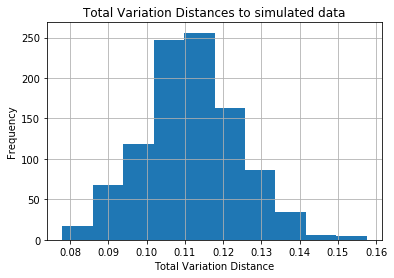

In [11]:
pd.Series(tvds).hist()
plt.title("Total Variation Distances to simulated data")
plt.xlabel("Total Variation Distance")
plt.ylabel("Frequency")

### Question 2e
Use the data test statistic computed in (2c) and the histogram from (2d) to reject or fail to reject the null hypothesis.  What is your conclusion and why? 

**2e answer:** The data test statistic is 0.5717, which is much greater than any of the total variation distance shown in the histogram.  Thus, it is unlikely 0.5717 came from the same distribution as the histogram, which is the distribution of total variation distances assuming the null hypothesis is true.  Thus we reject the null hypothesis.